In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 1.61803398875*8, 8
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

In [3]:
import sys
import numpy
def kingery_bulmash_ii_1(d):
    """
    Returns one array
    function [incident impulse, distance] = kingery_bulmash_ii_1(d)
    kingery_bulmash_ii_1 calculates the Kingery Bulmash incident impulse at
    a distance d from from a 1 lb TNT hemispherical surface burst.
    incident impulse and distance consists of the impulse in psi-ms and
    the distance in feet.
    S. Kevin McNeill, 1.0 (Explicitly not copyrighted).
    This function is released to the public domain; Any use is allowed.
    """    
    # Hemispherical Charge
    
    # Incident Impulse Imperial Function 1 (0.170 - 2.41ft)
    u_i_ii_f1_h = [0.832468843425, 3.0760329666]

    # Incident Impulse Imperial Function 1 (0.170 - 2.41ft)
    y_i_ii_f1_h = [1.57159240621, -0.502992763686,
                  0.171335645235, 0.0450176963051,
                 -0.0118964626402]
    zlog = numpy.log10(d)
    
    # Incident Impulse - Imperial Function 1 (0.170 - 2.41ft)
    u_ii_i1_h = u_i_ii_f1_h[0] + u_i_ii_f1_h[1] * zlog
    iii1h = 10**(y_i_ii_f1_h[0] + y_i_ii_f1_h[1] * u_ii_i1_h +
                 y_i_ii_f1_h[2] * u_ii_i1_h**2 + y_i_ii_f1_h[3] * u_ii_i1_h**3 +
                 y_i_ii_f1_h[4] * u_ii_i1_h**4)
    return iii1h

In [2]:
import sys
import numpy
def kingery_bulmash_ii_2(d):
    """
    Returns one array
    function [incident impulse, distance] = kingery_bulmash_ii_2(d)
    kingery_bulmash_ii calculates the Kingery Bulmash incident impulse at
    a distance d from from a 1 lb TNT hemispherical surface burst.
    incident impulse and distance consists of the impulse in psi-ms and
    the distance in feet.
    S. Kevin McNeill, 1.0 (Explicitly not copyrighted).
    This function is released to the public domain; Any use is allowed.
    """    
    # Hemispherical Charge
    
    # Incident Impulse Imperial Function 2 (2.41 - 100ft)
    u_i_ii_f2_h = [-2.91358616806, 2.40697745406]
    
    # Incident Impulse Imperial Function 2 (2.41 - 100ft)
    y_i_ii_f2_h = [0.719852655584, -0.384519026965,
                 -0.02601316706301, 0.005957987538,
                 0.014544526107, -0.00663289334734,
                 -0.00284189327204, 0.0013644816227]
    zlog = numpy.log10(d)
    
    u_ii_i2_h = u_i_ii_f2_h[0] + u_i_ii_f2_h[1] * zlog
    iii2h = 10**(y_i_ii_f2_h[0] + y_i_ii_f2_h[1] * u_ii_i2_h +
                y_i_ii_f2_h[2] * u_ii_i2_h**2 + y_i_ii_f2_h[3] * u_ii_i2_h**3 +
                y_i_ii_f2_h[4] * u_ii_i2_h**4 + y_i_ii_f2_h[5] * u_ii_i2_h**5 +
                y_i_ii_f2_h[6] * u_ii_i2_h**6 + y_i_ii_f2_h[7] * u_ii_i2_h**7)
    return iii2h

# TNT Equivalency for Incident Impulse

### Given:

$$Y = \frac{I}{W^{1/3}}$$

$$I=Y\cdot W^{1/3}$$

### For equal impulses:

$$I_{test} = I_{TNT}$$

$$Y_{test}\cdot W_{test}^{1/3}=Y_{TNT}\cdot W_{TNT}^{1/3}$$

The equivalent impulse from TNT is then,

$$EI=\frac{W_{TNT}^{1/3}}{W_{test}^{1/3}}=\frac{Y_{test}}{Y_{TNT}}$$

### For equal distances:

$$Z=\frac{R}{W^{1/3}}$$

$$R=Z\cdot W^{1/3}$$

$$R_{test}=R_{TNT}$$

$$Z_{test}\cdot W_{test}^{1/3}=Z_{TNT}\cdot W_{TNT}^{1/3}$$

$$\frac{W_{TNT}^{1/3}}{W_{test}^{1/3}}=\frac{Z_{test}}{Z_{TNT}}$$

### Equal Scaled Impulses

Setting the $\frac{W_{TNT}^{1/3}}{W_{test}^{1/3}}$ equal to each other in the equations for equal impulses and equal distances we have,

$$1=\frac{Z_{test}}{Z_{TNT}}$$

$$1=\frac{Y_{test}}{Y_{TNT}}$$

or

$$\frac{Z_{test}}{Y_{test}}=\frac{Z_{TNT}}{Y_{TNT}}$$

and taking the logarithm base 10 of both sides we have,

$$log(Z_{test})-log(Y_{test})=log(Z_{TNT})-log(Y_{TNT})$$

and rearranging,

$$log(Z_{test})-log(Z_{TNT})=log(Y_{test})-log(Y_{TNT})$$

$$\frac{log(Y_{test})-log(Y_{TNT})}{log(Z_{test})-log(Z_{TNT})}=1$$

This represents the equation of a 45 degree line from a point $P(Y_{test},Z_{test})$ to a point $P(Y_{TNT},Z_{TNT})$ on a log-log plane.

### Plotting a Straight Line in Log-Log Space

The equation for a straight line in log log space is,

$$y=kx^m$$

where m is the slope, $m=\frac{\Delta (log\:y)}{\Delta (log\:x)}$

where k is the value of $y$ where the line crosses the $x=1$ axis.

Taking the $log_{10}$ of both sides we have,

$$log\:y = m\:log\:(x)+log\:(k)$$

$$log\:(k) = log\:(y) - m\:log\:(x)$$

Subsituting our variables for scaled impulse and distance and recalling that $m=1$ we have,

$$log\:(k) = log\:(Y_{test}) - log\:(Z_{test})$$

Raising both sides to the power of 10 we have,

$$k=10^{(log\:(Y_{test}) - log\:(Z_{test}))}$$

So the equation of the line with slope 1 and running through the point $(Z_{test},Y_{test})$ is,

$$Y_{test}=10^{(log\:(Y_{test}) - log\:(Z_{test}))}\cdot Z_{test}$$

$$Y_{test}=k\cdot Z_{test}$$

So the intersection between the Kingery Bulmash curve and the equation of the line with slope 1 and running through the point $(Z_{test},Y_{test})$ will give me the point $(Z_{TNT},Y_{TNT})$.  Which can be the used to calculate the Equivalent Impulse,
$$EI = \frac{Y_{test}}{Y_{TNT}}$$

In [4]:
# Flash Powder shots 1-3 at 35 ft.
i_test = 0.467268001 #psi-ms measured impulse for flash powder
r_test = 35 #ft  - distance to transducer for flash powder
w_test = 0.198416 #lb flash powder (90 g)

In [5]:
# Scaled Impulse for Test Explosive
# Y = I/W**1/3
y_test = i_test/(w_test)**(1/3)
print(r'The scaled impulse is {:2.4f} psi-ms/lb^1/3.'.format(y_test))

The scaled impulse is 0.8011 psi-ms/lb^1/3.


In [6]:
# Scaled Distance for Test Explosive
# Z = R/W**1/3
z_test = r_test/(w_test)**(1/3)
print('The scaled distance is {:2.4f} ft/lb^1/3.'.format(z_test))

The scaled distance is 60.0080 ft/lb^1/3.


The equation for a straight line in log-log space is,

$$y = k\cdot x^m$$

where k is the value of y where the line crosses the $x=1$ axis.

where $m$ is the slope of the line $m=\frac{\Delta log(y)}{\Delta log(x)}$

Taking the $log_{10}$ on both sides we have,

$$log(y)=m\cdot log(x)+log(k)$$

In our case the slope is one, therefore we need to find $k$.  Solving for $log(k)$ we have,

$$log(k) = log(y)-m\cdot log(x)$$

Raising both sides to the power of ten,

$$k=10^{(log(y)-m\cdot log(x))}$$

Substituting the variables for the test explosive we have,

$$k=10^{(log(Y_{test})-log(Z_{test}))}$$


In [7]:
# Value of the Y Where the LIne Crosses the X = 1 Axis
# K = 10**(np.log10(y_test)-np.log10(z_test))
import numpy as np
k_test = 10**(np.log10(y_test)-np.log10(z_test))
print('The y-intercept for log-log plot for the explosive under test is {:2.4f} psi-ms/lb^1/3.'.format(k_test))

The y-intercept for log-log plot for the explosive under test is 0.0134 psi-ms/lb^1/3.


To find the point at the intersection between the Kingery Bulmash curve and the equation of the line with slope 1 and running through the point $(Z_{test},Y_{test})$ we need to solve the Kingery Bulmash curve and the line simultaneously,

In [8]:
from scipy.optimize import fsolve
import numpy

def equations(p):
    # Hemispherical Charge
    
    # Incident Impulse Imperial Function 2 (2.41 - 100ft)
    u_i_ii_f2_h = [-2.91358616806, 2.40697745406]
    
    # Incident Impulse Imperial Function 2 (2.41 - 100ft)
    y_i_ii_f2_h = [0.719852655584, -0.384519026965,
                 -0.02601316706301, 0.005957987538,
                 0.014544526107, -0.00663289334734,
                 -0.00284189327204, 0.0013644816227]
    z, y = p
    
    zlog = numpy.log10(z)
    
    u_ii_i2_h = u_i_ii_f2_h[0] + u_i_ii_f2_h[1] * zlog

    return (10**(y_i_ii_f2_h[0] + y_i_ii_f2_h[1] * u_ii_i2_h +
                y_i_ii_f2_h[2] * u_ii_i2_h**2 + y_i_ii_f2_h[3] * u_ii_i2_h**3 +
                y_i_ii_f2_h[4] * u_ii_i2_h**4 + y_i_ii_f2_h[5] * u_ii_i2_h**5 +
                y_i_ii_f2_h[6] * u_ii_i2_h**6 + y_i_ii_f2_h[7] * u_ii_i2_h**7)-y, k_test*z-y)

x_test_tnt, y_test_tnt =  fsolve(equations, (50, 0.4))

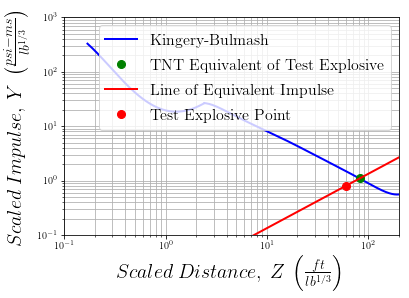

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Kinger Bulmash Lines
z1 = np.arange(0.17, 2.41, 0.01)
z2 = np.arange(2.41,200, 0.1)

y1 = kingery_bulmash_ii_1(z1)
y2 = kingery_bulmash_ii_2(z2)

# Slope = 1 Line Through Test (z_test, y_test)
z3 = np.arange(1, 200, 0.1)
y3 = k_test*z3


fig, ax = plt.subplots()

ax.loglog(z1,y1, color='blue', label='Kingery-Bulmash')
ax.loglog(z2,y2, color='blue')
ax.loglog(x_test_tnt,y_test_tnt, 'go', label='TNT Equivalent of Test Explosive')
ax.loglog(z3,y3, color='red', label='Line of Equivalent Impulse')
ax.loglog(z_test,y_test, 'ro', label='Test Explosive Point')
ax.grid(True, which="both", ls="-")
ax.legend()
ax.set_xlim(0.1,200)
ax.set_ylim(0.1,1000)
ax.set_xlabel(r'$Scaled\:Distance,\:Z\:\left(\frac{ft}{lb^{1/3}}\right)$')
ax.set_ylabel(r'$Scaled\:Impulse,\:Y\:\left(\frac{psi-ms}{lb^{1/3}}\right)$');

In [10]:
EI = y_test/y_test_tnt
print('The impulse TNT equivalency is {:2.4f}'.format(EI))

The impulse TNT equivalency is 0.7329
